In [37]:
from pygmo import *
import pygmo as pg
import numpy as np
import time
import matplotlib.pyplot as plt

In [38]:
population_size = 50
fitness_results = []
schwefel_data = pd.read_csv("Data/schwefel_data.csv")
schwefel = schwefel_data["val"].tolist()


In [39]:
class schwefel_problem:
    def __init__(self, dims):
        self.dims = dims
    def fitness(self, x):
        bias = -450.0
        z = np.array(x) - np.array(schwefel[:self.dims])
        F = np.max(np.abs(z))
        global fitness_results
        val = F + bias
        fitness_results.append(val)
        return [val, ]
   
    def get_bounds(self):
        return ([-100]*self.dims,[100]*self.dims)

In [49]:
def execute_algorithm(dims):
    global fitness_results
    fitness_results = []
    current_algorithm = None
    current_problem = None
    current_population = None
    if(dims == 50):
        current_algorithm = algorithm(cmaes(gen=200, cc=- 1, cs=- 1, c1=- 1, cmu=- 1, sigma0=-1, ftol=1e-09,xtol=1e-09, memory=False, force_bounds=True))
        current_problem = pg.problem(schwefel_problem(50))
        current_population = population(current_problem, 50)
    elif(dims == 500):
        current_algorithm = algorithm(simulated_annealing(Ts=1, Tf=1e-12, n_T_adj=25, n_range_adj=25, bin_size=15, start_range=.5))
        current_problem = pg.problem(schwefel_problem(500))
        current_population = population(current_problem, 1)
    else : 
        return "Provide correct dimensions"
        
    start_time = time.time()
    current_population_result = current_algorithm.evolve(current_population)
    ended_time = time.time()
    completed_time = ended_time - start_time
    print(current_population_result)
    print("\nComputational time:", round(completed_time, 2), "seconds\n")

Problem name: <class '__main__.schwefel_problem'>
	C++ class name: class pybind11::object

	Global dimension:			50
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-100, -100, -100, -100, -100, ... ]
	Upper bounds: [100, 100, 100, 100, 100, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 10050

	Thread safety: none

Population size: 50

List of individuals: 
#0:
	ID:			7031983439993464989
	Decision vector:	[-26.9075, -4.96696, -56.703, -95.0033, -4.53641, ... ]
	Fitness vector:		[-449.721]
#1:
	ID:			11640057353131295342
	Decision vector:	[-26.8664, -4.84521, -56.7009, -95.0454, -4.44059, ... ]
	Fitness vector:		[-449.653]
#2:
	ID:			3546845896629629099
	Decision vector:	[-26.9313, -4.64925, -56.7484, -94.9294, -4.34019, ... ]
	

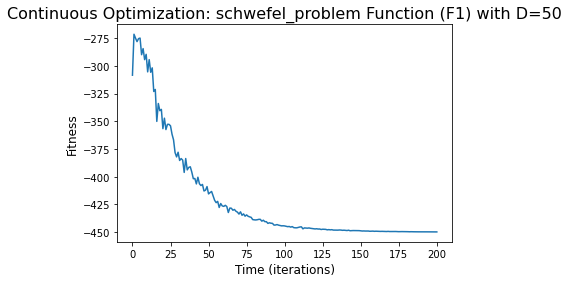

In [52]:
execute_algorithm(50)
arr = np.array([np.max(np.array(fitness_results[i:i+population_size]) * -1) for i in range(0, len(fitness_results), population_size)]) * -1
plt.plot(arr)
plt.title("Continuous Optimization: schwefel_problem Function (F1) with D=50", fontsize=16)
plt.xlabel("Time (iterations)", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.show()


Problem name: <class '__main__.schwefel_problem'>
	C++ class name: class pybind11::object

	Global dimension:			500
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-100, -100, -100, -100, -100, ... ]
	Upper bounds: [100, 100, 100, 100, 100, ... ]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 4687501

	Thread safety: none

Population size: 1

List of individuals: 
#0:
	ID:			11462142774049053112
	Decision vector:	[-26.8854, -4.91315, -56.8242, -95.0385, -4.34025, ... ]
	Fitness vector:		[-449.994]

Champion decision vector: [-26.8854, -4.91315, -56.8242, -95.0385, -4.34025, ... ]
Champion fitness: [-449.994]


Computational time: 405.88 seconds



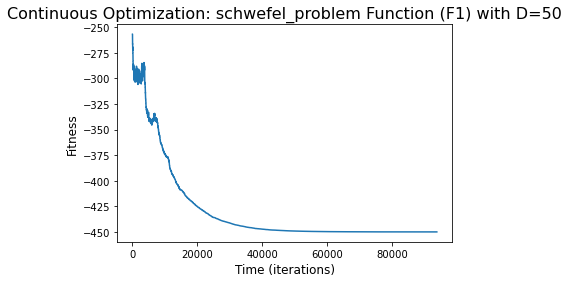

In [51]:
execute_algorithm(500)
arr = np.array([np.max(np.array(fitness_results[i:i+population_size]) * -1) for i in range(0, len(fitness_results), population_size)]) * -1
plt.plot(arr)
plt.title("Continuous Optimization: schwefel_problem Function (F1) with D=50", fontsize=16)
plt.xlabel("Time (iterations)", fontsize=12)
plt.ylabel("Fitness", fontsize=12)
plt.show()
